In [1]:
import sys
sys.path.append('../')

In [2]:
import matplotlib.pyplot as plt
from neuro_models.neuro_ode_models import QIF
from neuro_models.utils import plot_voltage

In [3]:
param = {
    "Vth": -55,
    "Vr": -75,
    "V1": -55,
    "V2": -65,
    "c": 0.25,
    "taum": 15
}

qif = QIF(param)

# Injected currents for testing
Ix_below = qif.critical_Ix - 0.5  # Ix < I_x*
Ix_above = qif.critical_Ix + 0.5 # Ix > I_x*

In [1]:
V0 = -70
t0 = 0.0
tn = 1000.0
dt = 0.1

In [5]:
# Run the Euler method for Ix < I_x*
qif.set_Ix(Ix_below)
t_below, V_below = qif.euler_method_spiking(y0=V0, t0=t0, tn=tn, dt=dt, yth=qif.Vth, yr=qif.Vr)

# Run the Euler method for Ix > I_x*
qif.set_Ix(Ix_above)
t_above, V_above = qif.euler_method_spiking(y0=V0, t0=t0, tn=tn, dt=dt, yth=qif.Vth, yr=qif.Vr)

In [6]:
below = {
    't': t_below,
    'V': V_below,
    'Ix': Ix_below,
    'color': 'b',
    'title': 'Voltage Dynamics for I_x < I_x*'
}

above = {
    't': t_above,
    'V': V_above,
    'Ix': Ix_above,
    'color': 'orange',
    'title': 'Voltage Dynamics for I_x > I_x*'
}

plot_param = {
    'below': below,
    'above': above
}

In [7]:
def plot_above_and_below(plot_param, yth, yr, filename=None):
    plt.figure(figsize=(12, 6))
    below = plot_param['below']
    plt.subplot(2, 1, 1)
    plot_voltage(below['t'], below['V'], below['Ix'], yth, yr, below['color'], below['title'])
    above = plot_param['above']
    plt.subplot(2, 1, 2)
    plot_voltage(above['t'], above['V'], above['Ix'], yth, yr, above['color'], above['title'])
    plt.tight_layout()
    if filename:
        plt.savefig(filename + '.png')
    plt.show()

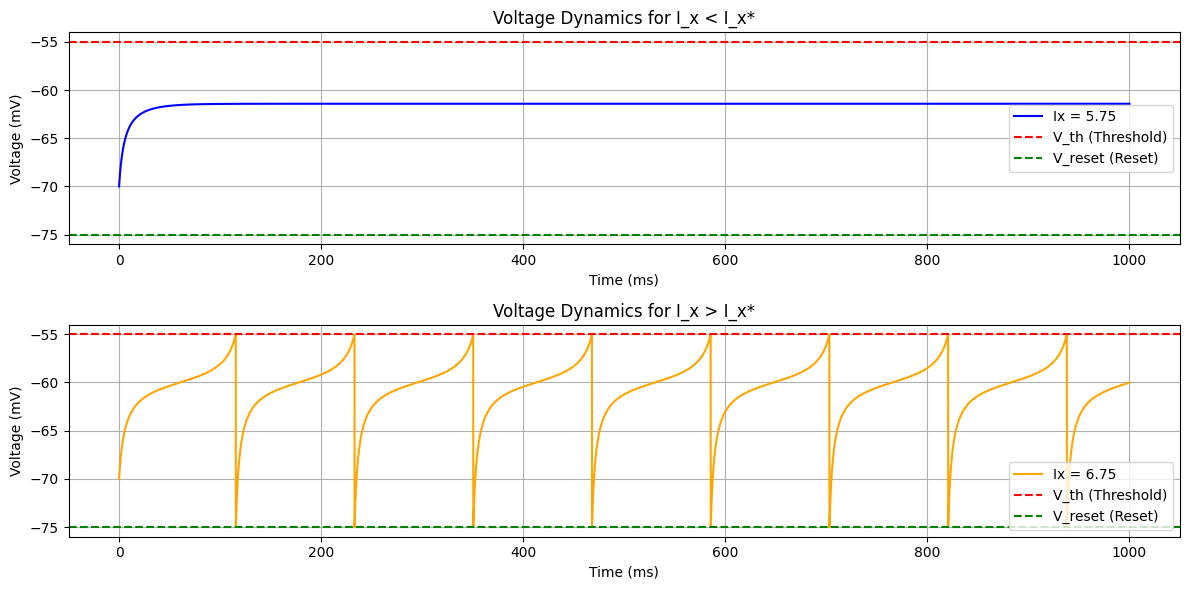

In [8]:
plot_above_and_below(plot_param, qif.Vth, qif.Vr, filename='figs/comp_neuro_hw2_prob1_partb')